In [266]:
import pandas as pd
df_invoice = pd.read_csv('fct_invoice.csv')
df_customer = pd.read_json('dim_customer.json')

In [267]:
#DataFrame of Invoice
df_invoice.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [268]:
#Data Frame of Customer
df_customer.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


EASY

1.

In [269]:
# 1. How many unique customers are in the dataset?
df_invoice['customer_id'].nunique()

5191

2.

In [270]:
# 2. a. What are the different categories of products available?
df_invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [271]:
# 2. b. How many unique categories are there?
df_invoice['category'].nunique()


8

3.

In [272]:
# 3. a. Which payment method is the most popular?
df_invoice['payment_method'].value_counts()
df_invoice['payment_method'].value_counts().index[0]

'Cash'

In [273]:
# 3. b. How many times was it used?
df_invoice['payment_method'].value_counts().iloc[0]

44447

MEDIUM

1.

In [274]:
# Creating a total sales column in df_invoice
df_invoice['total_sales'] = df_invoice['quantity'] * df_invoice['price']

df_invoice.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [275]:
# Summing the Categories
df_invoice.groupby('category')['total_sales'].sum()

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: total_sales, dtype: float64

In [276]:
# Finding top 3
df_invoice.groupby('category')['total_sales'].sum().head(3)

category
Books        8.345529e+05
Clothing     1.139968e+08
Cosmetics    6.792863e+06
Name: total_sales, dtype: float64

In [277]:
# 1. What are the three most popular categories, by total sales?
category_sales = df_invoice.groupby('category')['total_sales'].sum()
category_sales.sort_values(ascending = False).head(3)
top3 = category_sales.sort_values(ascending = False).head(3)

for category, sales in top3.items():
    print(f"{category}: ₱{sales:,.2f}")

Clothing: ₱113,996,791.04
Shoes: ₱66,553,451.47
Technology: ₱57,862,350.00


2.

In [278]:
# Merging Customer and Invoice Data for reference
merged = df_invoice.merge(df_customer, left_on='customer_id', right_on='id')
merged.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes


In [279]:
# 2. What are the total sales attributed to customers over the age of 45?
merged[merged['age'] > 45]['total_sales'].sum() # filteres and sums the age

82039768.15

3.

In [280]:
# Showing sales per month 
import matplotlib.pyplot as plt
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], dayfirst = True) # Formatting to dd/mm/yyyy
df_invoice['invoice_date'].dt.to_period('M').value_counts().sort_index()

invoice_date
2021-01    3835
2021-02    3407
2021-03    3813
2021-04    3724
2021-05    3848
2021-06    3783
2021-07    3984
2021-08    3723
2021-09    3670
2021-10    3916
2021-11    3798
2021-12    3881
2022-01    3847
2022-02    3447
2022-03    3947
2022-04    3763
2022-05    3849
2022-06    3798
2022-07    3893
2022-08    3912
2022-09    3683
2022-10    3848
2022-11    3765
2022-12    3799
2023-01    3926
2023-02    3628
2023-03     970
Freq: M, Name: count, dtype: int64

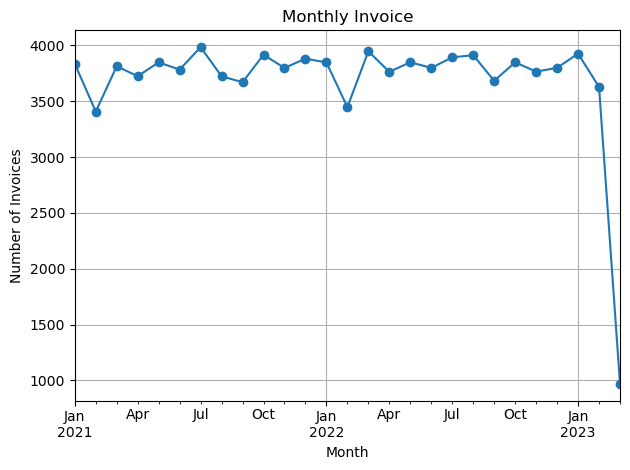

In [281]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

monthly_counts = df_invoice['invoice_date'].dt.to_period('M').value_counts().sort_index()

monthly_counts.plot(kind = 'line', marker = 'o', title = 'Monthly Invoice') # line graph
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [282]:
'''
From the line graph, we can see how customer activity fluctuates per month from 2021 through 
early 2023. Usually, there is a consistent invoice of around 3500 and 4000, showing steady
sales and activities without extreme valleys. There are slight peaks such as around mid 2021
and late 2022, which could possibly suggest holiday shopping. However, there is one significant
dip that appears at the end of the chart in the first quarter of 2023, possibly due to incomplete data
than an actual decline of invoices.
'''

'\nFrom the line graph, we can see how customer activity fluctuates per month from 2021 through \nearly 2023. Usually, there is a consistent invoice of around 3500 and 4000, showing steady\nsales and activities without extreme valleys. There are slight peaks such as around mid 2021\nand late 2022, which could possibly suggest holiday shopping. However, there is one significant\ndip that appears at the end of the chart in the first quarter of 2023, possibly due to incomplete data\nthan an actual decline of invoices.\n'

Hard

1. 

In [283]:
# remove Nan ages
merged.dropna(subset=['age'])
merged = merged.dropna(subset=['age']) 
merged.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,age,first_name,gender,id,last_name
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
5,I227836,349,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,7502.00,64.0,Cindy,F,349,Meyer
8,I293455,3208,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,2700.72,35.0,Travis,M,3208,Martin


In [284]:
# Add age ranges

lower = ((merged['age'] // 10) * 10).astype(int)
upper = (lower + 9).astype(int)
merged['age_range'] = lower.astype(str) + '-' + upper.astype(str)
merged['age'] = merged['age'].astype(int)

merged[['age', 'age_range']].head()

,age,age_range
1,34,30-39
2,46,40-49
3,46,40-49
5,64,60-69
8,35,30-39


In [285]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
age_order = sorted(merged['age_range'].unique(), key=lambda x: int(float(x.split('-')[0])))

pivot = pd.pivot_table(
    merged,
    index = 'category',
    columns = 'age_range',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value=0)

pivot = pivot[age_order]
pivot['Total'] = pivot.sum(axis=1)
pivot.loc['Total'] = pivot.sum()
pivot.style.format("{:,.2f}")


age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Total
category,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","500,540.85"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","67,993,026.64"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","4,015,500.28"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","503,659.46"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","40,085,354.30"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","370,163.61"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","33,996,900.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","2,393,216.00"
Total,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","149,858,361.14"
